# Code for Data Viz in R (ggplot2)

Language: R

Dataset: tips

From: https://www.kaggle.com/datasets/sakshisatre/tips-dataset?select=tip.csv

## 1. Setup

### 1.1 Install ggplot2

In [ ]:
# Install ggplot2 (for data viz)
install.packages("ggplot2")

# Install dplyr (for data transformation)
install.packages("dplyr")

### 1.2 Load package

In [55]:
# Load ggplot2 and dplyr
library(ggplot2)
library(dplyr)

### 1.3 Load dataset

In [56]:
# Load and preview the dataset

## Load the dataset
tips <- read.csv("tips.csv")

## Preview the dataset
head(tips)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


## 2. Basic Plots

### 2.1 Histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


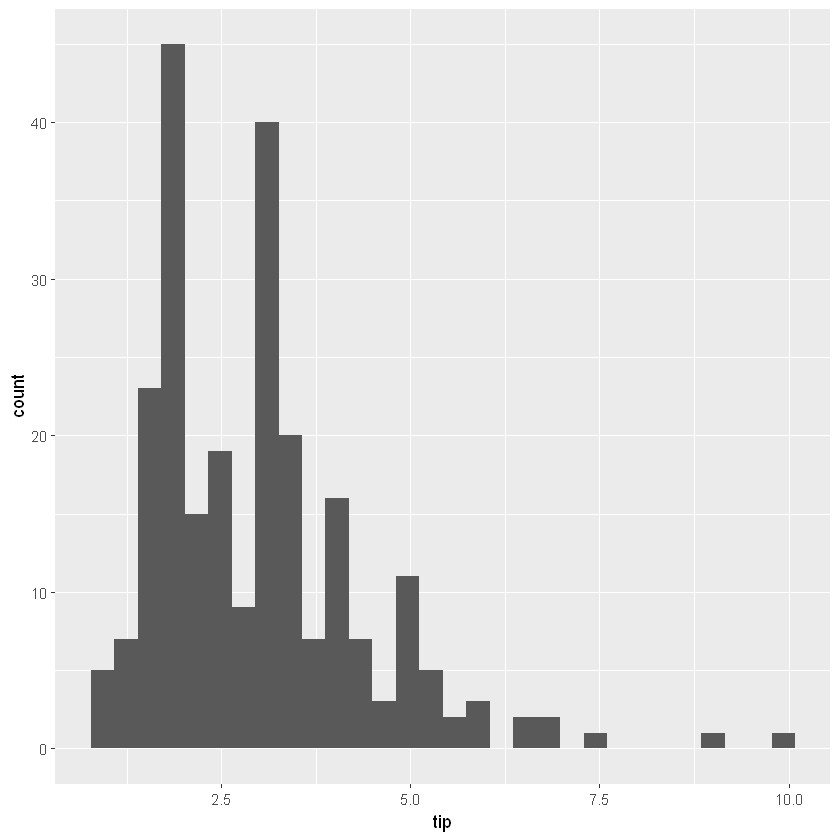

In [5]:
# Histogram: distribution of `tip` (default binwidth)
ggplot(tips, aes(x = tip)) +
  geom_histogram()

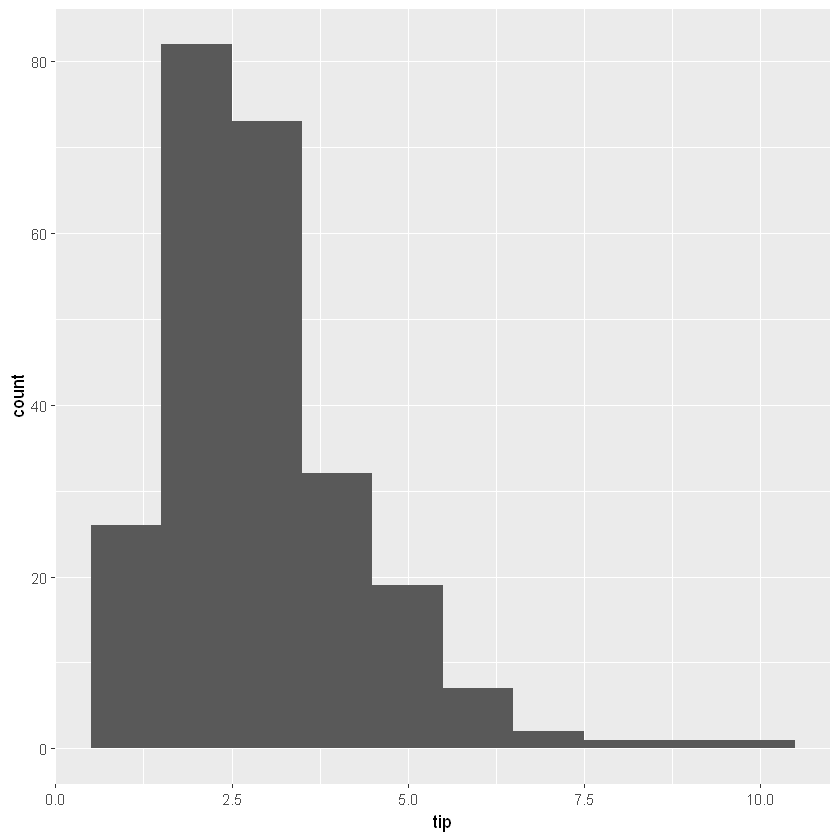

In [6]:
# Histogram: distribution of `tip` (binwidth = 1)
ggplot(tips, aes(x = tip)) +
  geom_histogram(binwidth = 1)

### 2.2 Box Plots

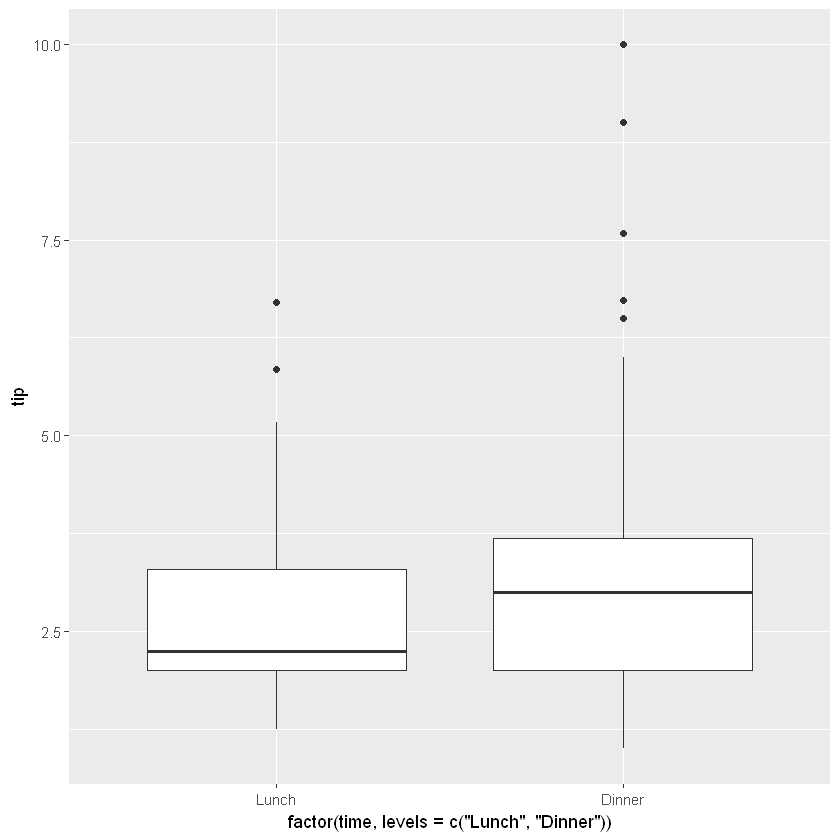

In [66]:
# Box plot: distribution of `tip` by `time`
ggplot(tips, aes(x = factor(time, levels = c("Lunch", "Dinner")), y = tip)) +
  geom_boxplot()

### 2.3 Scatter Plots

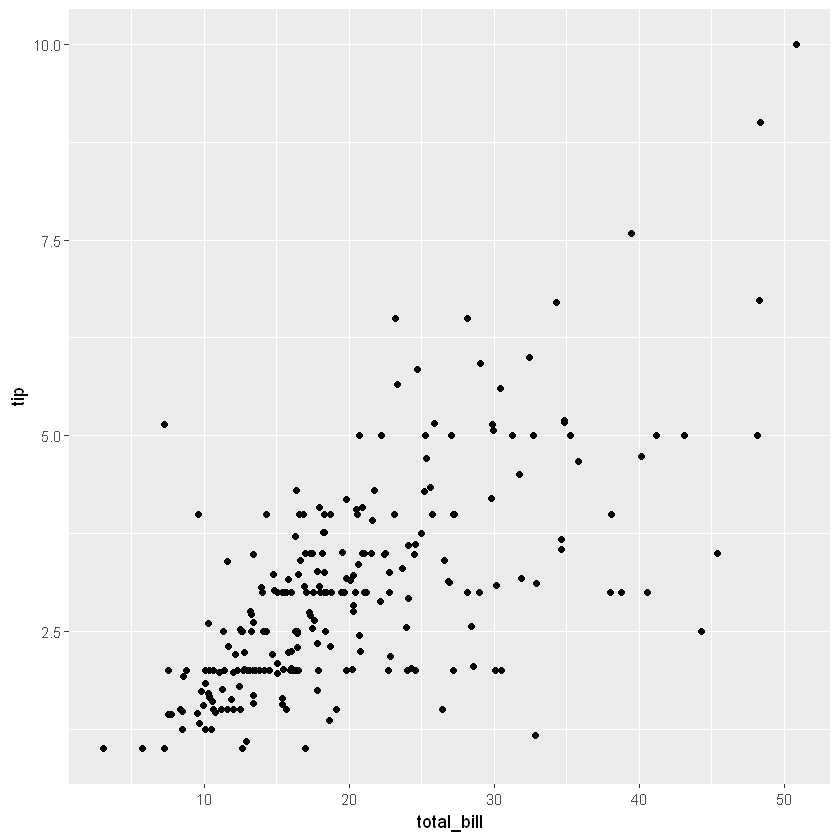

In [8]:
# Scatter plot: relationship between `tip` and `total_bill`
ggplot(tips, aes(x = total_bill, y = tip)) +
  geom_point()

`geom_smooth()` using formula = 'y ~ x'


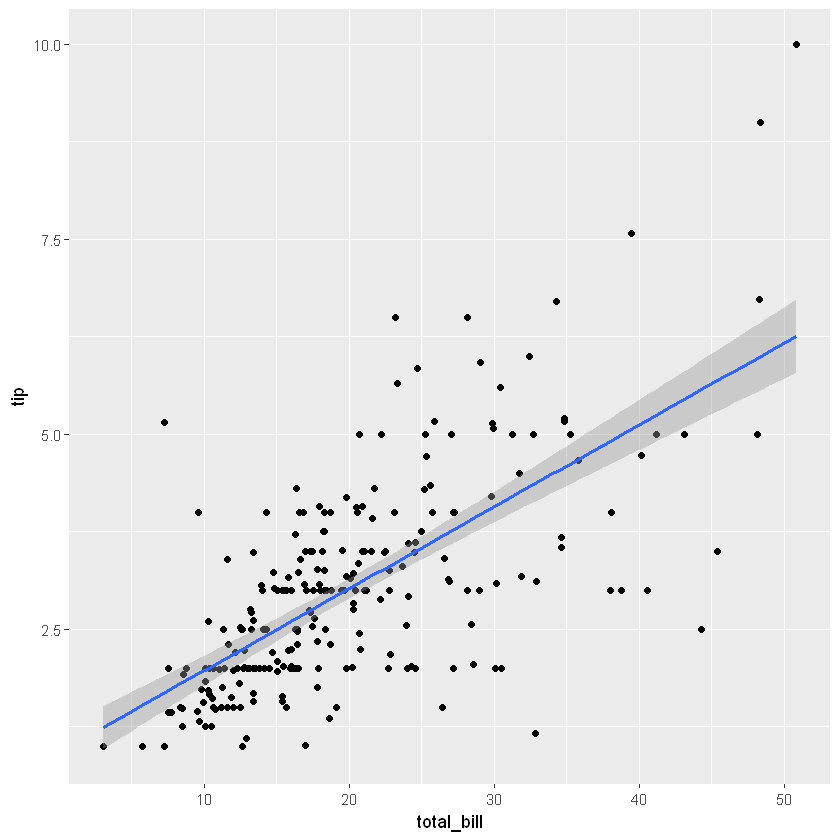

In [9]:
# Scatter plot: relationship between `tip` and `total_bill` with a trend line
ggplot(tips, aes(x = total_bill, y = tip)) +
  geom_point() +
  geom_smooth(method = "lm")

### 2.4 Line Plots

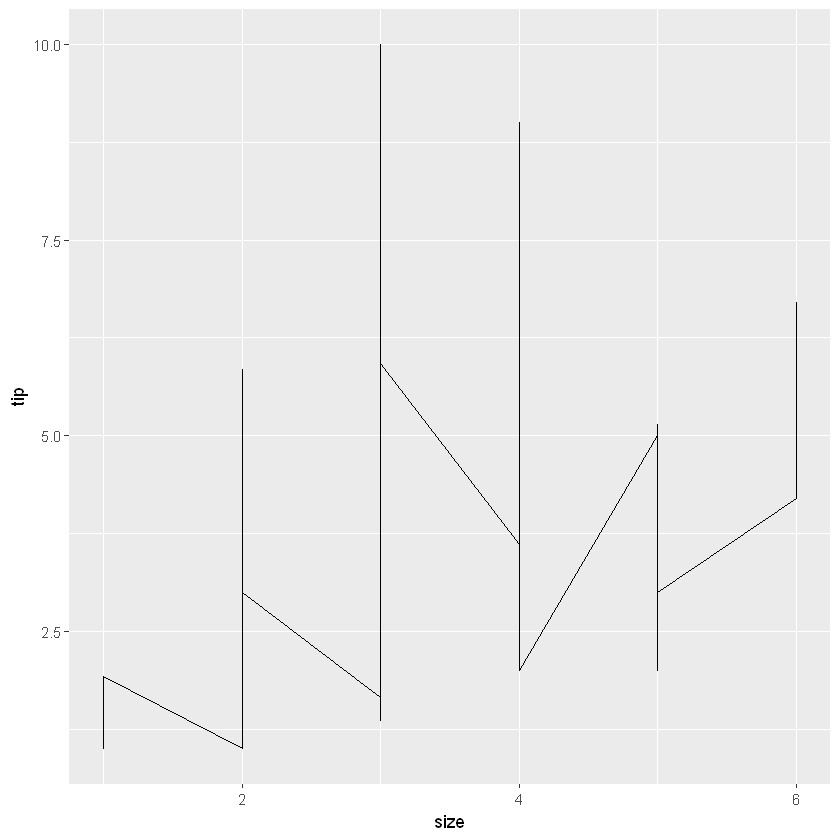

In [16]:
# Line plot: `tip` vs `size`
ggplot(tips, aes(x = size, y = tip)) +
  geom_line()

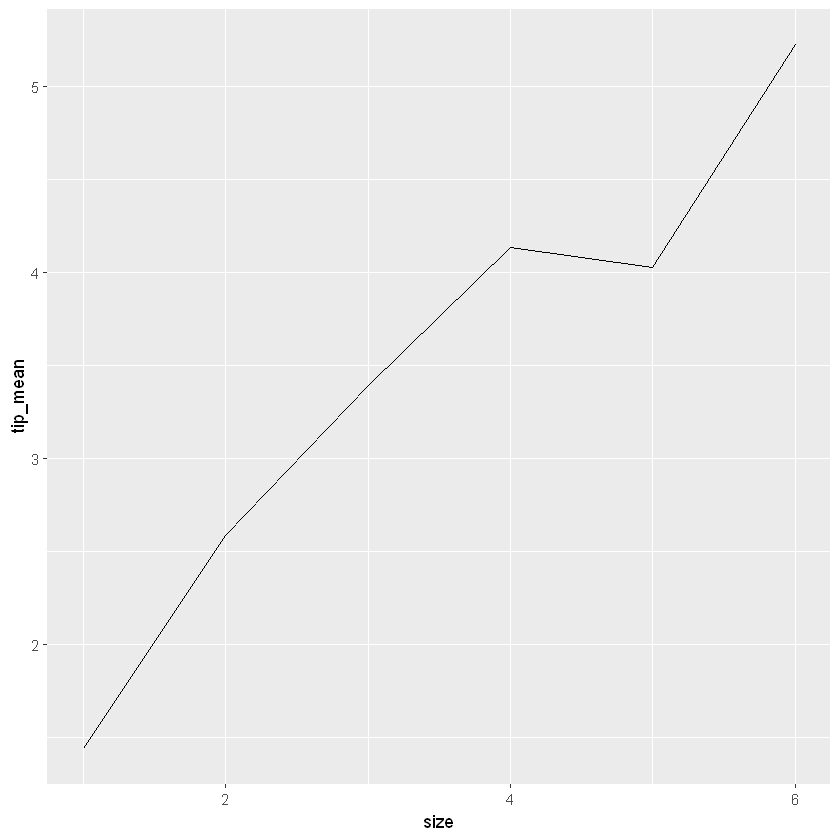

In [61]:
# Line plot: fix the plot by calculating mean for `tip` by `size`

## Calculate mean for each `size`
tips_by_size <- tips |>
                group_by(size) |>
                summarise(tip_mean = mean(tip))

## Create the plot                
ggplot(tips_by_size, aes(x = size, y = tip_mean)) +
  geom_line()

### 2.5 Bar Plots

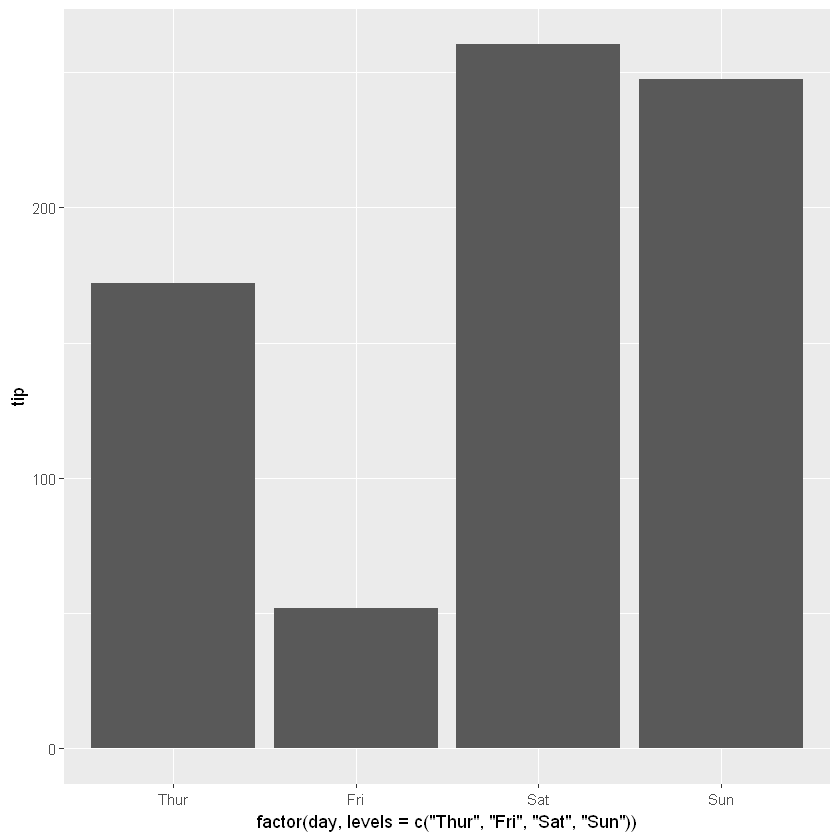

In [22]:
# Bar plot: `tip` by `day`
ggplot(tips, aes(x = factor(day, levels = c("Thur", "Fri", "Sat", "Sun")), y = tip)) +
  geom_col()

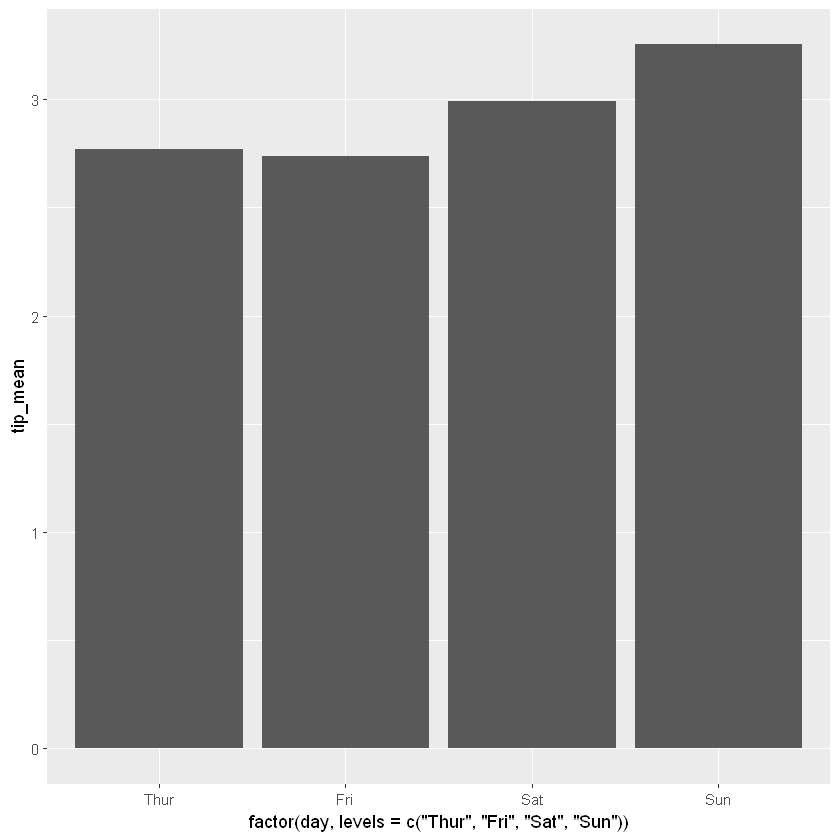

In [23]:
# Bar plot with mean sleep hours

## Calculate mean sleep hours
tips_by_day <- tips |>
                group_by(day) |>
                summarise(tip_mean = mean(tip))

## Create a bar plot
ggplot(tips_by_day, aes(x = factor(day, levels = c("Thur", "Fri", "Sat", "Sun")), y = tip_mean)) +
    geom_col()

## 3. Adding More Variables

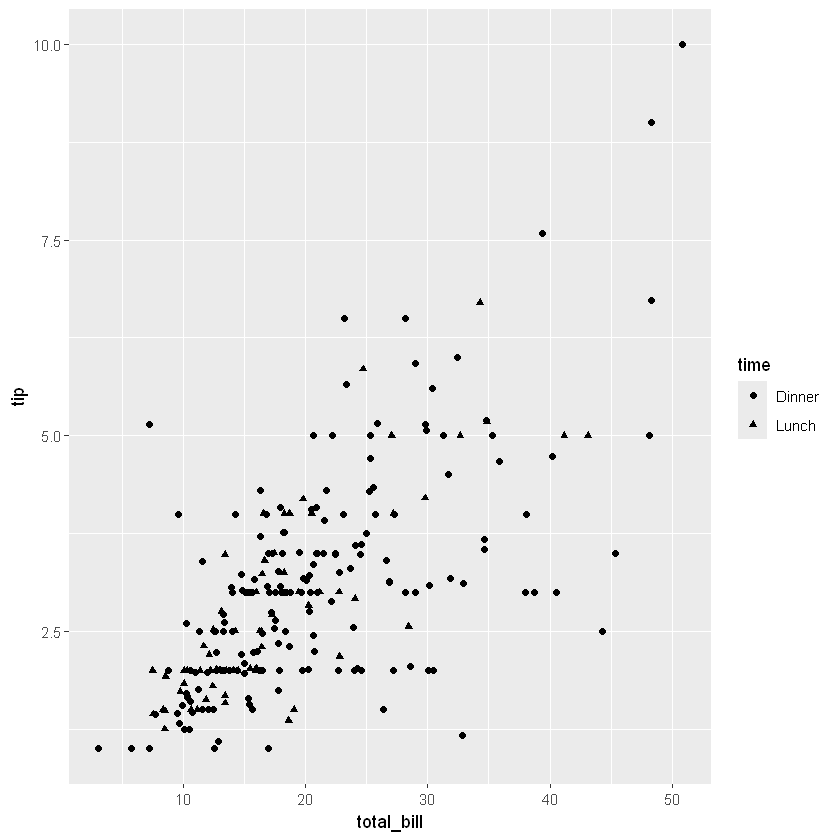

In [62]:
# Adding a third variable: `tip` vs `total_bill` with `size` as size
ggplot(tips, aes(x = total_bill, y = tip, size = size)) +
  geom_point()

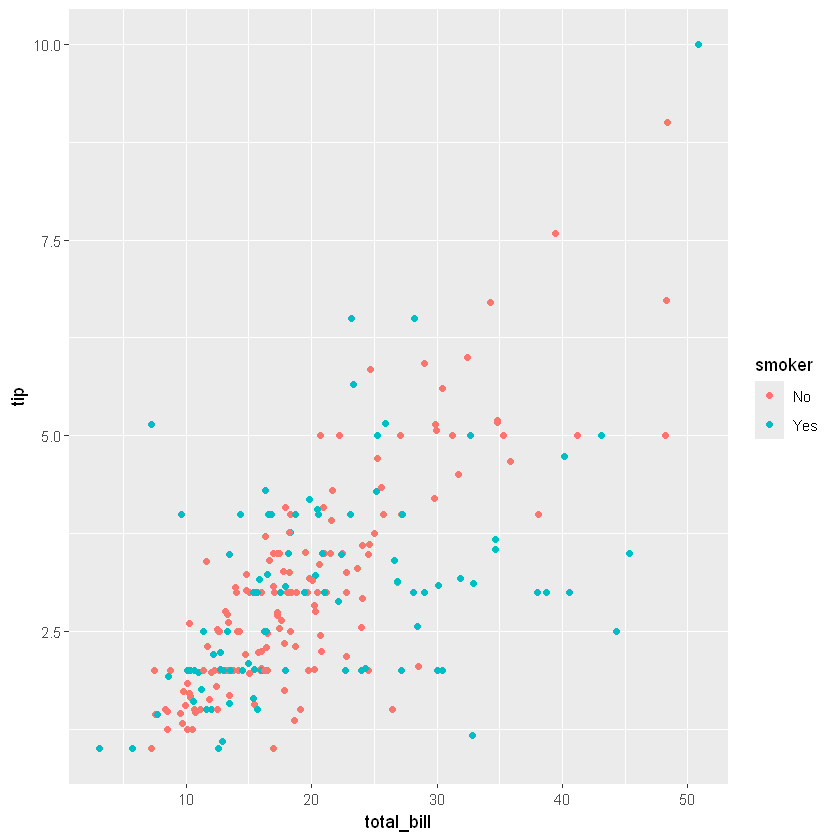

In [32]:
# Adding a third variable: `tip` vs `total_bill` with `smoker` as color
ggplot(tips, aes(x = total_bill, y = tip, color = smoker)) +
  geom_point()

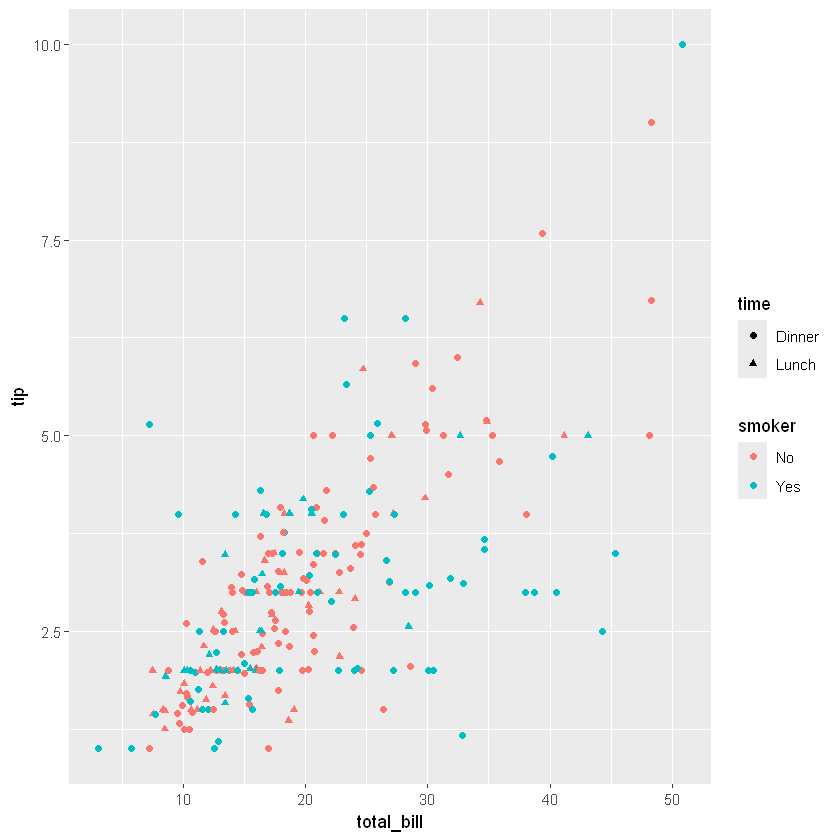

In [63]:
# Adding two variables: `tip` vs `total_bill` with `smoker` as color and `size` as size
ggplot(tips, aes(x = total_bill, y = tip, size = size, color = smoker)) +
  geom_point()

## 4. Customisations

### 4.1 Attributes

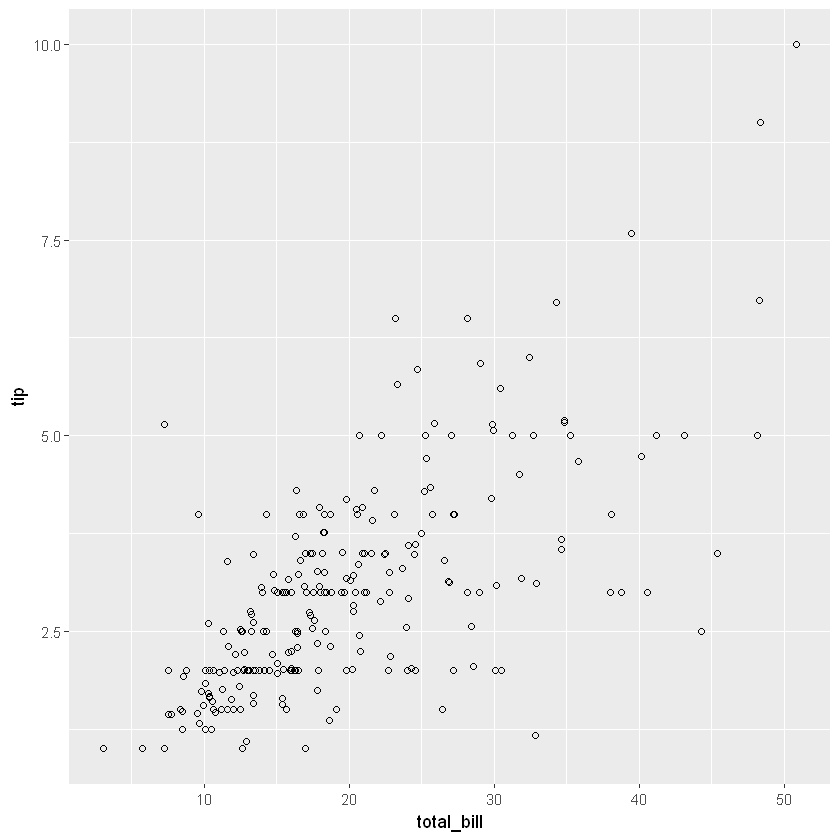

In [37]:
# Adjusting shape: `tip` vs `total_bill`
ggplot(tips, aes(x = total_bill, y = tip)) +
  geom_point(shape = 1)

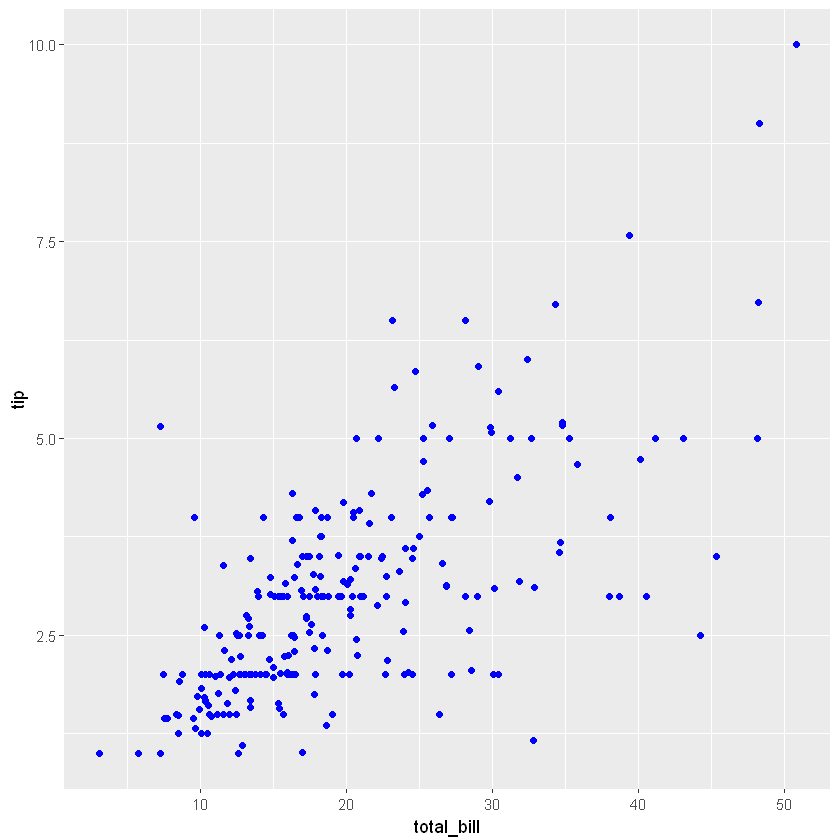

In [43]:
# Adjust color
ggplot(tips, aes(x = total_bill, y = tip)) +
  geom_point(color = "blue")

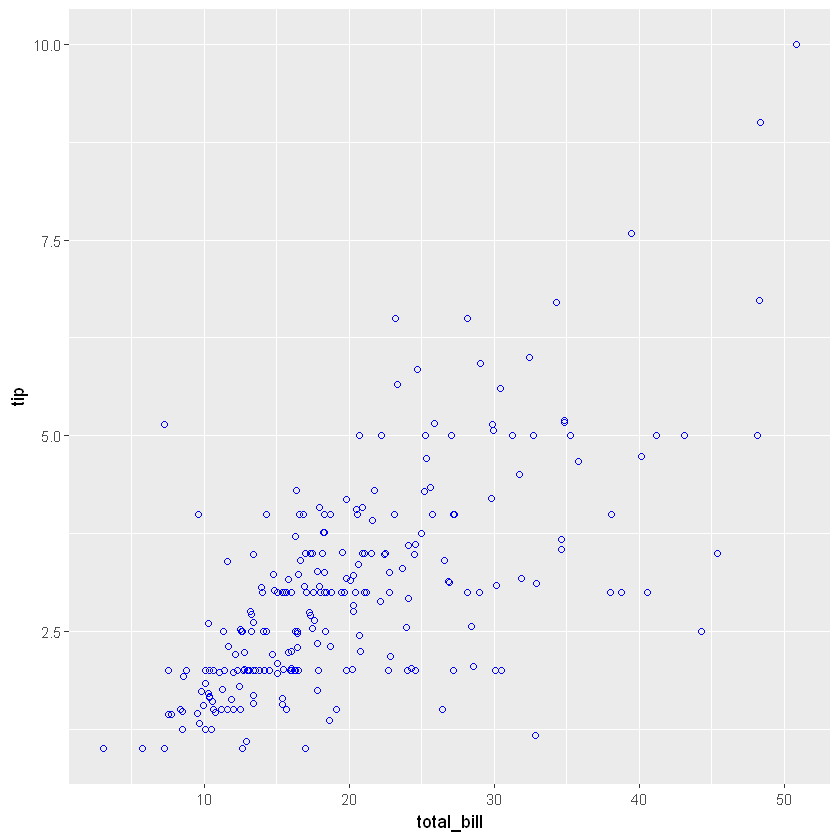

In [44]:
# Adjusting shape: `tip` vs `total_bill`
ggplot(tips, aes(x = total_bill, y = tip)) +
  geom_point(shape = 1, color = "blue")

### 4.2 Themes

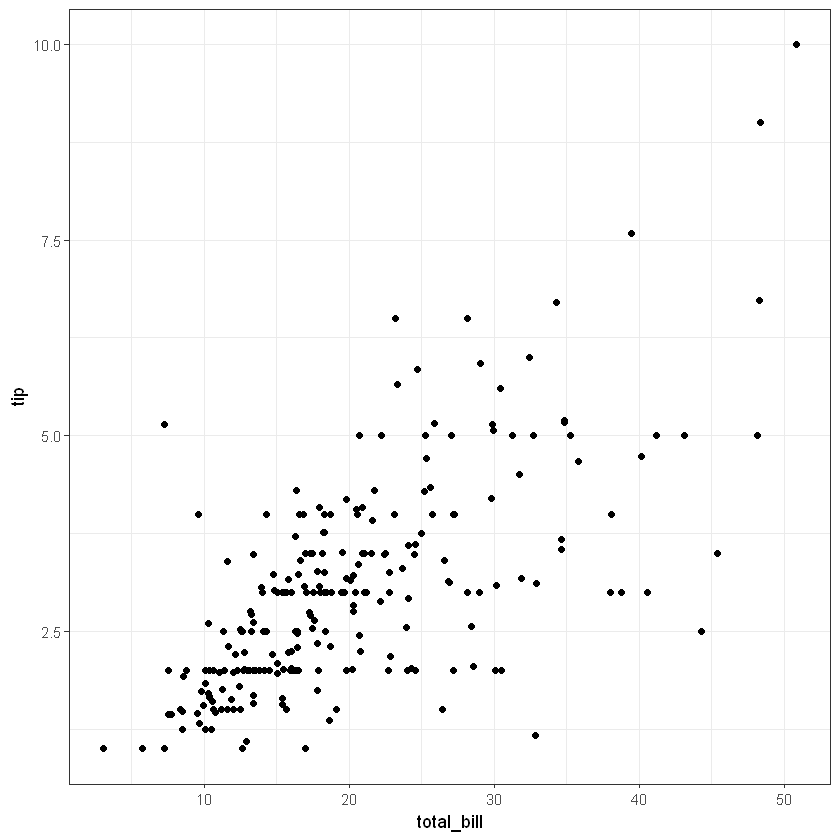

In [48]:
# Classic theme
ggplot(tips, aes(x = total_bill, y = tip)) +
  geom_point() +
  theme_bw()

### 4.3 Labels

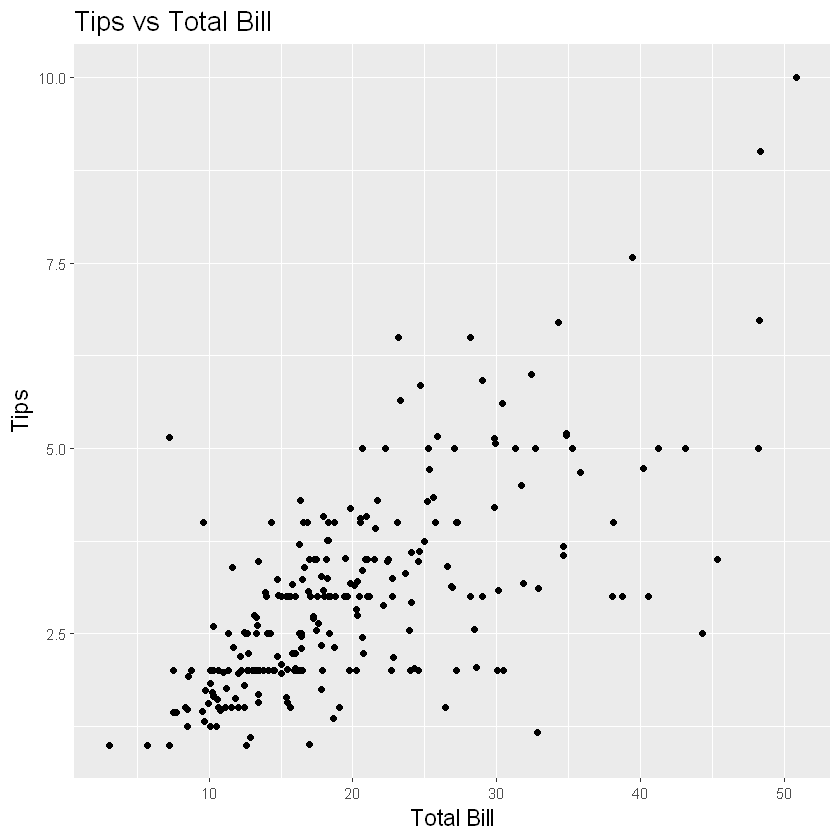

In [49]:
# Adding labels
ggplot(tips, aes(x = total_bill, y = tip)) +
  geom_point() +
     theme(plot.title = element_text(size = 16),
           axis.title.x = element_text(size = 14), 
           axis.title.y = element_text(size = 14)) +
     labs(title = "Tips vs Total Bill",
          x = "Total Bill",
          y = "Tips")

## 5. All Together

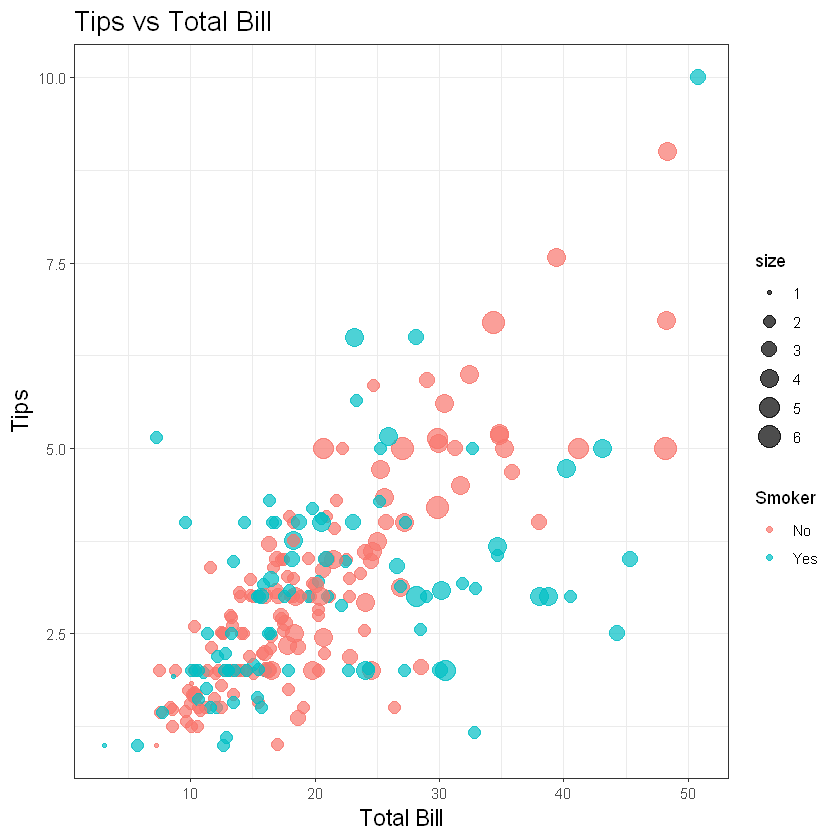

In [60]:
# Putting it all together
ggplot(tips, aes(x = total_bill, y = tip, size = size, color = smoker)) +
  geom_point(alpha = 0.7) +
     theme_bw() +
     theme(plot.title = element_text(size = 16),
           axis.title.x = element_text(size = 14), 
           axis.title.y = element_text(size = 14)) +
     labs(title = "Tips vs Total Bill",
          x = "Total Bill",
          y = "Tips",
          color = "Smoker")